In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Define the autoencoder
input_dim = x_train.shape[1]
encoding_dim = 32  # Size of the encoded representation

# Input Layer
input_img = Input(shape=(input_dim,))

# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder Model
autoencoder = Model(input_img, decoded)

# Encoder Model
encoder = Model(input_img, encoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history=autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# You can visualize or analyze encoded_imgs and decoded_imgs as needed


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3844 - val_loss: 0.1894
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1797 - val_loss: 0.1521
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1475 - val_loss: 0.1326
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1303 - val_loss: 0.1202
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1194 - val_loss: 0.1119
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1116 - val_loss: 0.1063
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1066 - val_loss: 0.1023
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1030 - val_loss: 0.0993
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1000 - val_loss: 0.0971
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0980 - val_loss: 0.0956
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0966 - val_loss: 0.0946
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA

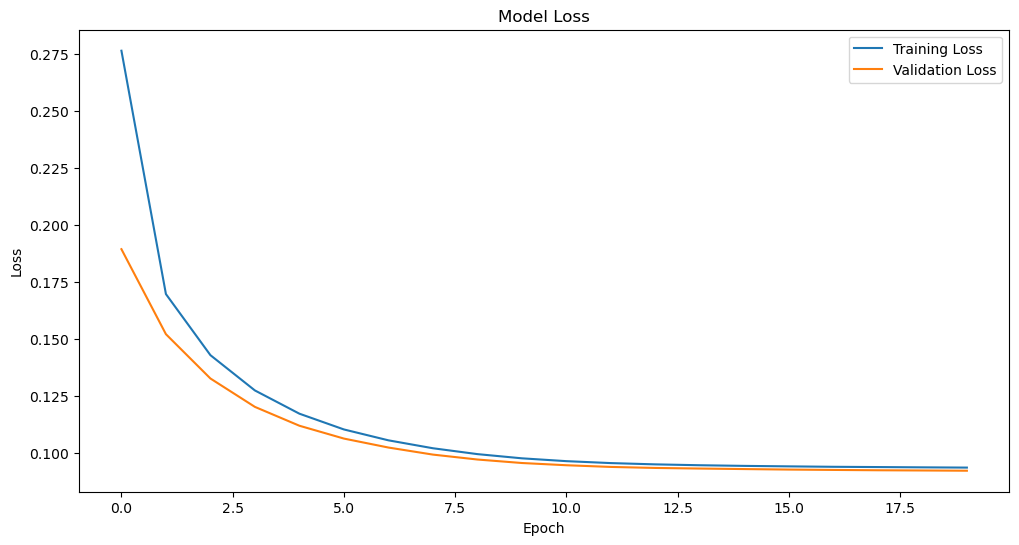

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step


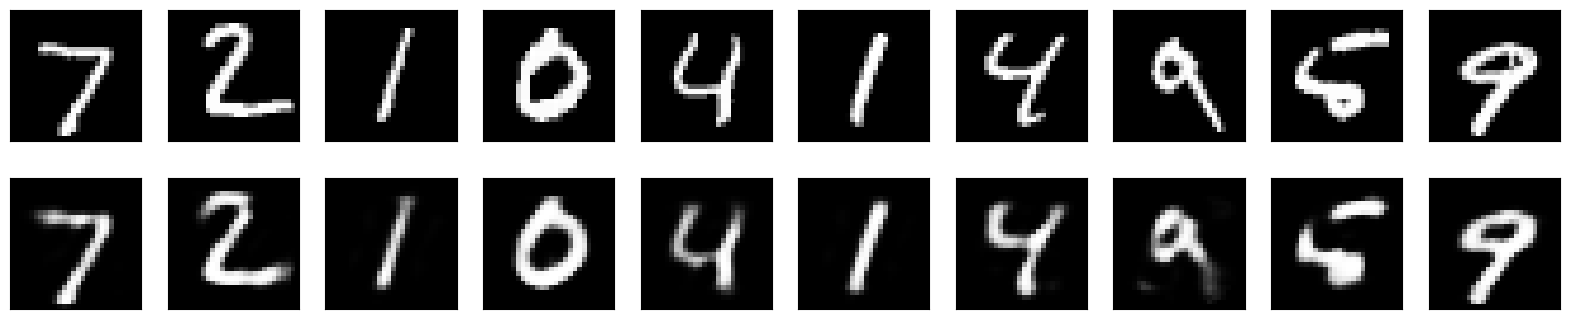

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

encoded_imgs = encoder.predict(x_test)

decoded_imgs = autoencoder.predict(x_test)

# Function to plot original and reconstructed images
def plot_reconstruction(x_test, decoded_imgs, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Display original
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

# Plot original vs. reconstructed images
plot_reconstruction(x_test, decoded_imgs)